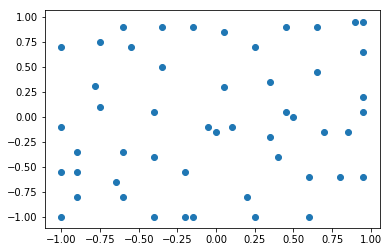

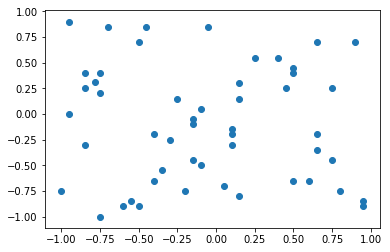

(1.1734, 4.235, 15.137)
(1.0389, 6.902, 17.255)


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
import DPP
from itertools import product

def get_action_variance(A_batch):
    A_batch = np.array(A_batch)
    num_actions = np.shape(A_batch)[0]
    dim_actions = np.shape(A_batch)[1]

    distance = 0.
    num = 0.
    num2 = 0.
    for i in range(num_actions):
        A = np.square(A_batch - A_batch[i])
        A = np.sum(A, axis = 1)

        num = num + (A < 0.1).sum()
        num2 = num2 + (A < 0.3).sum()

        A = np.sqrt(A)
        distance = distance + np.sum(A)

    num = (num-num_actions)*100/(num_actions*(num_actions-1))
    num = round(num, 3)

    num2 = (num2-num_actions)*100/(num_actions*(num_actions-1))
    num2 = round(num2, 3)

    distance = distance / (num_actions*(num_actions-1))
    distance = round(distance, 4)

    return distance, num, num2


num_actions = 1
new_actions = 50
A_batch = []
A_batch = np.random.random([num_actions,2])*2 - 1
A_batch = np.array(A_batch)

x = np.arange(-1, 1, 0.05)
y = np.arange(-1, 1, 0.05)
B_batch = np.array(list(product(x, y)))
#print(B_batch)

C_batch = DPP.sample_k_2(A_batch, B_batch, 0.1, new_actions)
plt.scatter(C_batch[:, 0], C_batch[:, 1])
plt.show()

D_batch = []
initial = np.random.choice(range(len(B_batch)), size=new_actions, replace=False)
X = [False] * len(B_batch)
for i in initial:
    X[i] = True
X = np.array(X)    

D_batch = np.array(B_batch)[X]
D_batch = np.concatenate((A_batch, D_batch))
plt.scatter(D_batch[:, 0], D_batch[:, 1])
plt.show()

d, n1, n2 = get_action_variance(C_batch)
print(d, n1, n2)
d, n1, n2 = get_action_variance(D_batch)
print(d, n1, n2)

In [2]:
K = [[1,2],[3,4]]

print(np.linalg.det(K))


-2.0000000000000004
